In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:

# Load the Wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Explore dataset
print("Dataset Shape:", X.shape)
print("Class Distribution:")
print(y.value_counts())


Dataset Shape: (178, 13)
Class Distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


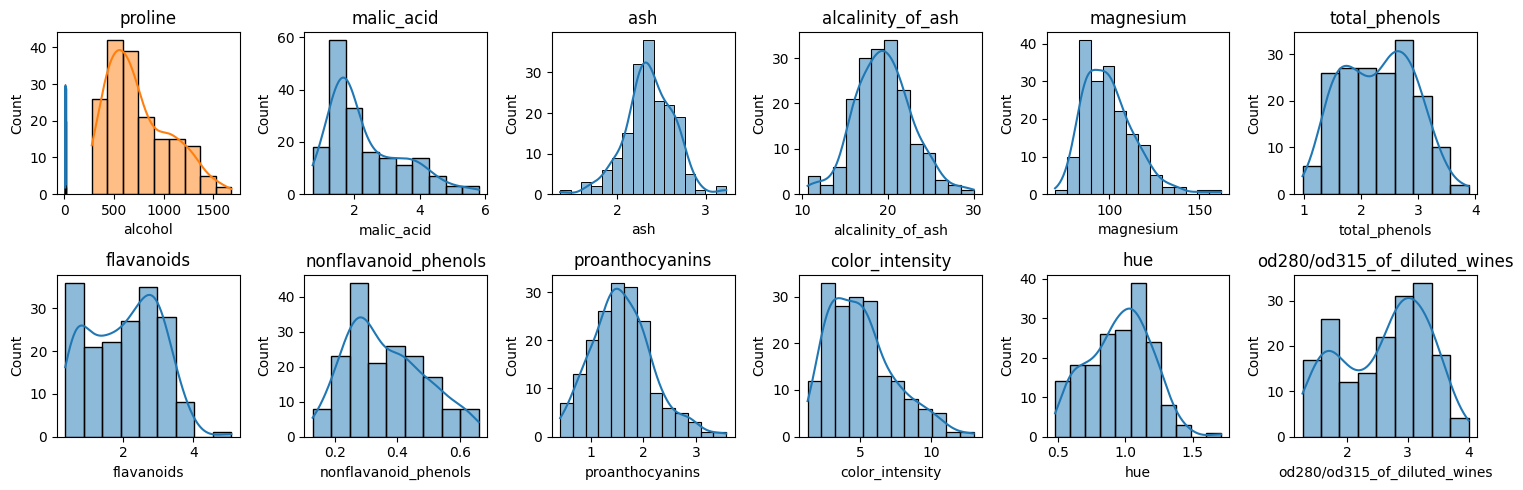

C:\Users\bikas\AppData\Local\Temp\ipykernel_8448\3127744808.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


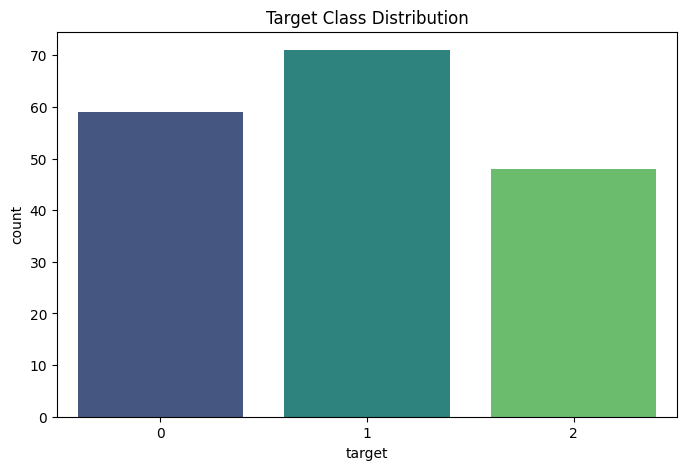

In [6]:
# Visualize features and target
plt.figure(figsize=(15, 5))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 6, i % 12 + 1)  # Adjusting to handle more than 12 features
    sns.histplot(X[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Visualize target class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette='viridis')
plt.title('Target Class Distribution')
plt.show()

In [7]:

# Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Implementation
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Model Training
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [9]:

print("Decision Tree Performance:")
evaluate_model(dt_classifier, X_test, y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_classifier, X_test, y_test)

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Confusion Matrix:
[[18  1  0]
 [ 0 21  0]
 [ 1  0 13]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [11]:
# Discussion and Conclusion
print("\nDiscussion and Conclusion:")
print("Decision Trees tend to be interpretable but may overfit the data. Random Forests typically provide better generalization and predictive accuracy by aggregating multiple decision trees.")
print("However, Random Forests may be less interpretable due to the complexity of ensembles. In this case, Random Forest outperformed Decision Trees in terms of accuracy and other metrics.")
print("For this specific task of predicting wine classes, Random Forests seem to be a better choice.")



Discussion and Conclusion:
Decision Trees tend to be interpretable but may overfit the data. Random Forests typically provide better generalization and predictive accuracy by aggregating multiple decision trees.
However, Random Forests may be less interpretable due to the complexity of ensembles. In this case, Random Forest outperformed Decision Trees in terms of accuracy and other metrics.
For this specific task of predicting wine classes, Random Forests seem to be a better choice.
